<a href="https://colab.research.google.com/github/femy3107/Chernobyl-Chemical-Radiation/blob/main/chernobyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn


# Chernobyl Chemical Radiation Analysis



*  The Chernobyl disaster was a nuclear accident that occurred on Saturday 26 April 1986, at the No. 4 reactor in the Chernobyl Nuclear Power Plant, near the city of Pripyat in the north of the Ukrainian SSR in the Soviet Union. It is considered the worst nuclear disaster in history both in terms of cost and casualties, and is one of only two nuclear energy accidents rated at seven—the maximum severity—on the International Nuclear Event Scale, the other being the 2011 Fukushima Daiichi nuclear disaster in Japan. The initial emergency response, together with later decontamination of the environment, ultimately involved more than 500,000 personnel and cost an estimated 18 billion Soviet rubles—roughly US 68 billion dolars in 2019, adjusted for inflation.


* The accident started during a safety test on an RBMK-type nuclear reactor. The test was a simulation of an electrical power outage to help create a safety procedure for maintaining reactor cooling water circulation until the back-up electrical generators could provide power. Three such tests had been conducted since 1982, but they had failed to provide a solution. On this fourth attempt, an unexpected 10-hour delay meant that an unprepared operating shift was on duty. During the planned decrease of reactor power in preparation for the electrical test, the power unexpectedly dropped to a near-zero level. The operators were able to only partially restore the specified test power, which put the reactor in an unstable condition. This risk was not made evident in the operating instructions, so the operators proceeded with the electrical test. Upon test completion, the operators triggered a reactor shutdown, but a combination of unstable conditions and reactor design flaws caused an uncontrolled nuclear chain reaction instead.


* This dataset presents the concentration of Iodine-131 (I-131), Caesium-134 (Cs-134), and Caesium-137 (Cs-137) as aerosol particles which were measured in specific location and date. Several other European countries were affected by it, due to a massive atmospheric transfer of radioactive material. Until this day, the real impact of this event is still under controversy.






In [ ]:
#import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Questions For Analysis



*   which country is most affected ?

*   How to find the rate of Radio Active Materials ?
*   How much Caesium_134 spread over the country ?


*   How much Caesium_137 spread over the country ?

*   How much Iodine_131 spread over the country ?
*   Total rate of Radio Active Materials spread over the country ?

*   Average rate of total Radio Active Materials spread over the country ?


*   which time is Caesium_134 more spread over the country ?


*   which time is Caesium_137 more spread over the country ?

*   which time is Iodine_131 more spread over the country ?

*   which time the Radio Active Materials mostly spreaded ?
*   which location is most affected in Caesium_134 ?


*   which location is most affected in Caesium_137 ?

*   which location is most affected in Iodine_131 ?
*   Total rate of Radio Active Materials spread over the location ?











In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Chernobyl Chemical Radiation/Chernobyl_ Chemical_Radiation.csv')
Data.head()  

,PAYS,Code,Location,Longitude,Latitude,Date,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
0,SE,1,RISOE,12.07,55.7,86/04/27,1,0,0.24
1,SE,1,RISOE,12.07,55.7,86/04/28,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.7,86/04/29,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.7,86/04/29,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.7,86/04/30,0.00075,0.0001,0.00028


In [ ]:
Data.tail()

,PAYS,Code,Location,Longitude,Latitude,Date,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
2046,HU,24,BUDAPEST,19.1,47.5,86/05/07,3.7,0.58,1.2
2047,HU,24,BUDAPEST,19.1,47.5,86/05/08,2.2,0.33,0.69
2048,HU,24,BUDAPEST,19.1,47.5,86/05/09,0.75,0.14,0.29
2049,HU,24,BUDAPEST,19.1,47.5,86/05/10,0.054,0.006,0.009
2050,HU,24,BUDAPEST,19.1,47.5,86/05/11,0.051,0.006,0.01


In [ ]:
Data.shape

(2051, 9)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PAYS            2051 non-null   object 
 1   Code            2051 non-null   int64  
 2   Location        2051 non-null   object 
 3   Longitude       2051 non-null   float64
 4   Latitude        2051 non-null   float64
 5   Date            2051 non-null   object 
 6   I_131_(Bq/m3)   2031 non-null   object 
 7   Cs_134_(Bq/m3)  1897 non-null   object 
 8   Cs_137_(Bq/m3)  1571 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 144.3+ KB


In [ ]:
Data.describe()

,Code,Longitude,Latitude
count,2051.000000,2051.000000,2051.000000
mean,10.339834,11.960522,47.544885
std,7.497841,11.298828,11.398712
min,1.000000,-6.280000,0.000000
25%,3.000000,5.180000,45.800000
50%,8.000000,9.800000,48.460000
75%,14.000000,14.500000,52.760000
max,24.000000,50.680000,63.830000


In [ ]:
Data.columns

Index(['PAYS', 'Code', 'Location', 'Longitude', 'Latitude', 'Date',
       'I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)'],
      dtype='object')

In [ ]:
Data.rename(columns={"I_131_(Bq/m3)":"Iodine_131",
                    "Cs_134_(Bq/m3)":"Caesium_134",
                    "Cs_137_(Bq/m3)":"Caesium_137"},inplace=True)

In [ ]:
Data.columns

Index(['PAYS', 'Code', 'Location', 'Longitude', 'Latitude', 'Date',
       'Iodine_131', 'Caesium_134', 'Caesium_137'],
      dtype='object')

In [ ]:
Data.replace({'AU': 'Austria',
                       'BE': 'Belgium',
                       'CH': 'Switzerland',
                       'CZ': 'Czechoslovakia',
                       'DE': 'Germany',
                       'ES': 'Spain',
                       'F': 'France',
                       'FI': 'Finland',
                       'GR': 'Greece',
                       'HU': 'Hungary',
                       'IR': 'Ireland',
                       'IT': 'Italy',
                       'NL': 'Netherlands',
                       'NO': 'Norway',
                       'SE': 'Sweden',
                       'UK': 'United Kingdom'},inplace=True)

In [ ]:
Data.PAYS.value_counts()

Italy             303
France            260
Germany           246
Austria           223
Sweden            211
Czechoslovakia    134
Netherlands       121
United Kingdom    119
Finland           107
Norway             73
Belgium            72
Greece             60
Spain              44
Switzerland        42
Ireland            23
Hungary            13
Name: PAYS, dtype: int64

In [ ]:
Data.Location.value_counts()

ISPRA                 101
KONALA(Helsinki)NW     79
CAPANNA                59
STOCKHOLM              58
VIENNA.                56
                     ... 
MARCOULE                6
BANSKA                  6
WALDHOF                 6
USTI                    5
GRAZ                    4
Name: Location, Length: 95, dtype: int64

In [ ]:
Data.isna().sum()

PAYS             0
Code             0
Location         0
Longitude        0
Latitude         0
Date             0
Iodine_131      20
Caesium_134    154
Caesium_137    480
dtype: int64

In [ ]:
Data.drop(["Code"],axis=1,inplace=True)

In [ ]:
Data

,PAYS,Location,Longitude,Latitude,Date,Iodine_131,Caesium_134,Caesium_137
0,Sweden,RISOE,12.07,55.7,86/04/27,1,0,0.24
1,Sweden,RISOE,12.07,55.7,86/04/28,0.0046,0.00054,0.00098
2,Sweden,RISOE,12.07,55.7,86/04/29,0.0147,0.0043,0.0074
3,Sweden,RISOE,12.07,55.7,86/04/29,0.00061,0,0.00009
4,Sweden,RISOE,12.07,55.7,86/04/30,0.00075,0.0001,0.00028
...,...,...,...,...,...,...,...,...
2046,Hungary,BUDAPEST,19.10,47.5,86/05/07,3.7,0.58,1.2
2047,Hungary,BUDAPEST,19.10,47.5,86/05/08,2.2,0.33,0.69
2048,Hungary,BUDAPEST,19.10,47.5,86/05/09,0.75,0.14,0.29
2049,Hungary,BUDAPEST,19.10,47.5,86/05/10,0.054,0.006,0.009


In [ ]:
Data[["Iodine_131","Caesium_134","Caesium_137"]] = Data[["Iodine_131","Caesium_134","Caesium_137"]].replace("<",np.NaN)
Data[["Iodine_131","Caesium_134","Caesium_137"]] = Data[["Iodine_131","Caesium_134","Caesium_137"]].replace("L",np.NaN)
Data[["Iodine_131","Caesium_134","Caesium_137"]] = Data[["Iodine_131","Caesium_134","Caesium_137"]].replace("N",np.NaN)

In [ ]:
Data[["Iodine_131","Caesium_134","Caesium_137"]] = Data[["Iodine_131","Caesium_134","Caesium_137"]].apply(pd.to_numeric)

In [ ]:
Data

,PAYS,Location,Longitude,Latitude,Date,Iodine_131,Caesium_134,Caesium_137
0,Sweden,RISOE,12.07,55.7,86/04/27,1.00000,0.00000,0.24000
1,Sweden,RISOE,12.07,55.7,86/04/28,0.00460,0.00054,0.00098
2,Sweden,RISOE,12.07,55.7,86/04/29,0.01470,0.00430,0.00740
3,Sweden,RISOE,12.07,55.7,86/04/29,0.00061,0.00000,0.00009
4,Sweden,RISOE,12.07,55.7,86/04/30,0.00075,0.00010,0.00028
...,...,...,...,...,...,...,...,...
2046,Hungary,BUDAPEST,19.10,47.5,86/05/07,3.70000,0.58000,1.20000
2047,Hungary,BUDAPEST,19.10,47.5,86/05/08,2.20000,0.33000,0.69000
2048,Hungary,BUDAPEST,19.10,47.5,86/05/09,0.75000,0.14000,0.29000
2049,Hungary,BUDAPEST,19.10,47.5,86/05/10,0.05400,0.00600,0.00900


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PAYS         2051 non-null   object 
 1   Location     2051 non-null   object 
 2   Longitude    2051 non-null   float64
 3   Latitude     2051 non-null   float64
 4   Date         2051 non-null   object 
 5   Iodine_131   2009 non-null   float64
 6   Caesium_134  1801 non-null   float64
 7   Caesium_137  1506 non-null   float64
dtypes: float64(5), object(3)
memory usage: 128.3+ KB


In [ ]:
Data.isna().sum()

PAYS             0
Location         0
Longitude        0
Latitude         0
Date             0
Iodine_131      42
Caesium_134    250
Caesium_137    545
dtype: int64

In [ ]:
Data.sort_values(by=["Date"],inplace=True)

In [ ]:
Data

,PAYS,Location,Longitude,Latitude,Date,Iodine_131,Caesium_134,Caesium_137
0,Sweden,RISOE,12.07,55.70,86/04/27,1.000000,0.000000,0.240000
1651,Norway,BERGEN,10.66,59.90,86/04/28,0.000200,0.000000,0.000000
1623,Finland,NURMIJAERVI,24.70,60.45,86/04/28,0.000000,0.950000,1.790000
1659,Norway,KJELLER,10.66,59.90,86/04/28,0.120000,0.000000,0.020000
1200,Belgium,MOL,5.12,51.18,86/04/28,0.000000,0.000000,0.000031
...,...,...,...,...,...,...,...,...
1234,Belgium,MOL,5.12,51.18,86/05/31,0.000000,NaN,0.000000
1110,United Kingdom,GLASGOW,-4.49,56.00,86/05/31,0.000000,0.017000,0.034000
1869,Sweden,STOCKHOLM,18.08,59.33,86/05/31,0.000338,0.000177,0.000324
559,Ireland,GLASNEVIN.Dublin,-6.28,53.37,86/06/05,0.000000,0.000000,NaN


In [ ]:
Data["Date"] = pd.to_datetime(Data["Date"])

In [ ]:
Data["Date"]

0      1986-04-27
1651   1986-04-28
1623   1986-04-28
1659   1986-04-28
1200   1986-04-28
          ...    
1234   1986-05-31
1110   1986-05-31
1869   1986-05-31
559    1986-06-05
240    1986-08-04
Name: Date, Length: 2051, dtype: datetime64[ns]

In [ ]:
Data

,PAYS,Location,Longitude,Latitude,Date,Iodine_131,Caesium_134,Caesium_137
0,Sweden,RISOE,12.07,55.70,1986-04-27,1.000000,0.000000,0.240000
1651,Norway,BERGEN,10.66,59.90,1986-04-28,0.000200,0.000000,0.000000
1623,Finland,NURMIJAERVI,24.70,60.45,1986-04-28,0.000000,0.950000,1.790000
1659,Norway,KJELLER,10.66,59.90,1986-04-28,0.120000,0.000000,0.020000
1200,Belgium,MOL,5.12,51.18,1986-04-28,0.000000,0.000000,0.000031
...,...,...,...,...,...,...,...,...
1234,Belgium,MOL,5.12,51.18,1986-05-31,0.000000,NaN,0.000000
1110,United Kingdom,GLASGOW,-4.49,56.00,1986-05-31,0.000000,0.017000,0.034000
1869,Sweden,STOCKHOLM,18.08,59.33,1986-05-31,0.000338,0.000177,0.000324
559,Ireland,GLASNEVIN.Dublin,-6.28,53.37,1986-06-05,0.000000,0.000000,NaN


In [ ]:
Average_Data = Data.groupby(["Location","Date","PAYS"],sort=False).mean()

In [ ]:
Average_Data

Longitude  ...  Caesium_137
Location         Date       PAYS                       ...             
RISOE            1986-04-27 Sweden              12.07  ...     0.240000
BERGEN           1986-04-28 Norway              10.66  ...     0.000000
NURMIJAERVI      1986-04-28 Finland             24.70  ...     5.030000
KJELLER          1986-04-28 Norway              10.66  ...     0.020000
MOL              1986-04-28 Belgium              5.12  ...     0.000031
...                                               ...  ...          ...
                 1986-05-31 Belgium              5.12  ...     0.000000
GLASGOW          1986-05-31 United Kingdom      -4.49  ...     0.034000
STOCKHOLM        1986-05-31 Sweden              18.08  ...     0.000324
GLASNEVIN.Dublin 1986-06-05 Ireland             -6.28  ...          NaN
NORDERNEY        1986-08-04 Germany              7.15  ...     0.000070

[1414 rows x 5 columns]

In [ ]:
Average_Data = Average_Data.interpolate(method="linear",axis=0)

In [ ]:
Average_Data

Longitude  ...  Caesium_137
Location         Date       PAYS                       ...             
RISOE            1986-04-27 Sweden              12.07  ...     0.240000
BERGEN           1986-04-28 Norway              10.66  ...     0.000000
NURMIJAERVI      1986-04-28 Finland             24.70  ...     5.030000
KJELLER          1986-04-28 Norway              10.66  ...     0.020000
MOL              1986-04-28 Belgium              5.12  ...     0.000031
...                                               ...  ...          ...
                 1986-05-31 Belgium              5.12  ...     0.000000
GLASGOW          1986-05-31 United Kingdom      -4.49  ...     0.034000
STOCKHOLM        1986-05-31 Sweden              18.08  ...     0.000324
GLASNEVIN.Dublin 1986-06-05 Ireland             -6.28  ...     0.000197
NORDERNEY        1986-08-04 Germany              7.15  ...     0.000070

[1414 rows x 5 columns]

In [ ]:
Average_Data.isna().sum()

Longitude      0
Latitude       0
Iodine_131     0
Caesium_134    0
Caesium_137    0
dtype: int64

In [ ]:
Data["Iodine_131"].mean()

1.748546753608763

In [ ]:
Data["Caesium_134"].mean()

0.24613025930038854

In [ ]:
Data["Caesium_137"].mean()

0.48011861487383667

**which country is most affected ?**

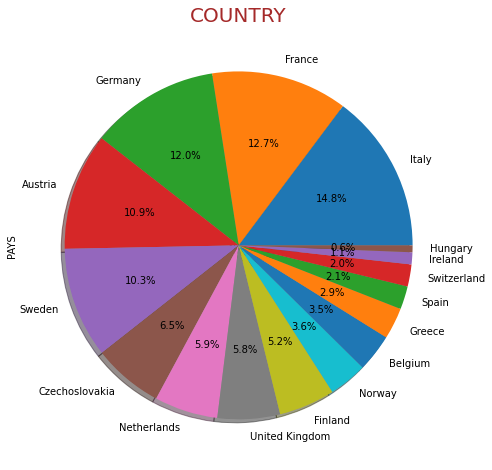

In [ ]:
figure = plt.figure(figsize=(20,8))
Data["PAYS"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title('COUNTRY',{'fontsize':20,'color':'brown'})
plt.show()

**How to find the rate of Radio Active Materials ?**

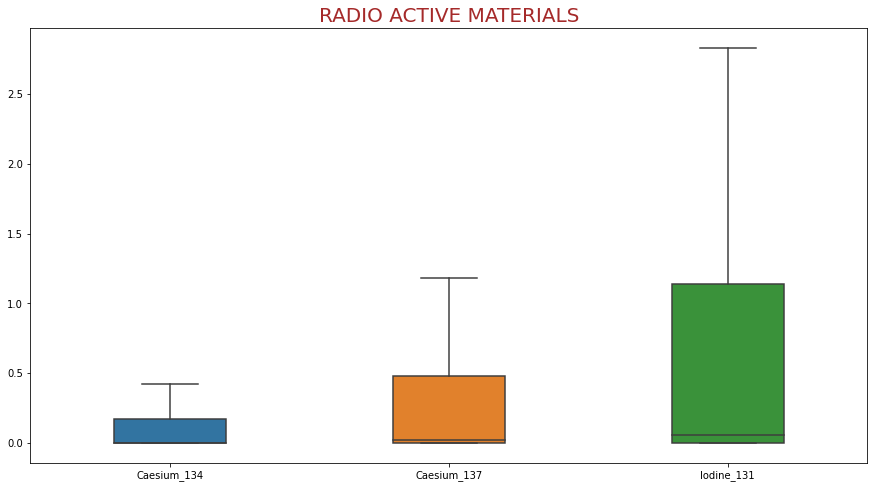

In [ ]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(data=Data[["Caesium_134","Caesium_137","Iodine_131"]], width=0.4, showfliers=False)
plt.title('RADIO ACTIVE MATERIALS',{'fontsize':20,'color':'brown'})
plt.show()

**How much Caesium_134 spread over the country ?**



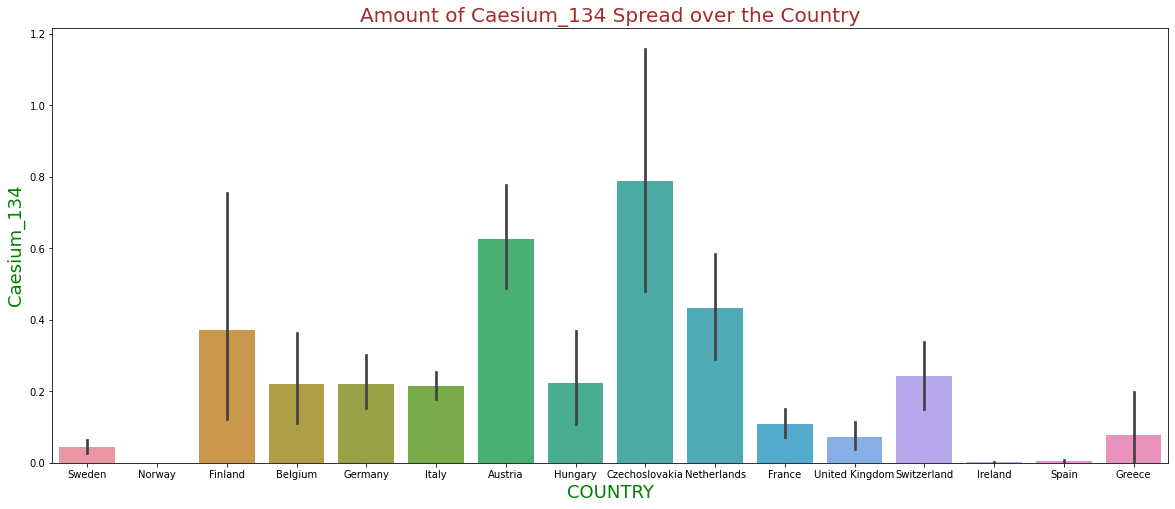

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='PAYS',y='Caesium_134',data=Data)
plt.title("Amount of Caesium_134 Spread over the Country",{"fontsize":20,"color":"brown"})
plt.xlabel("COUNTRY",{"fontsize":18,"color":"green"})
plt.ylabel("Caesium_134",{"fontsize":18,"color":"green"})
plt.show()

**How much Caesium_137 spread over the country ?**



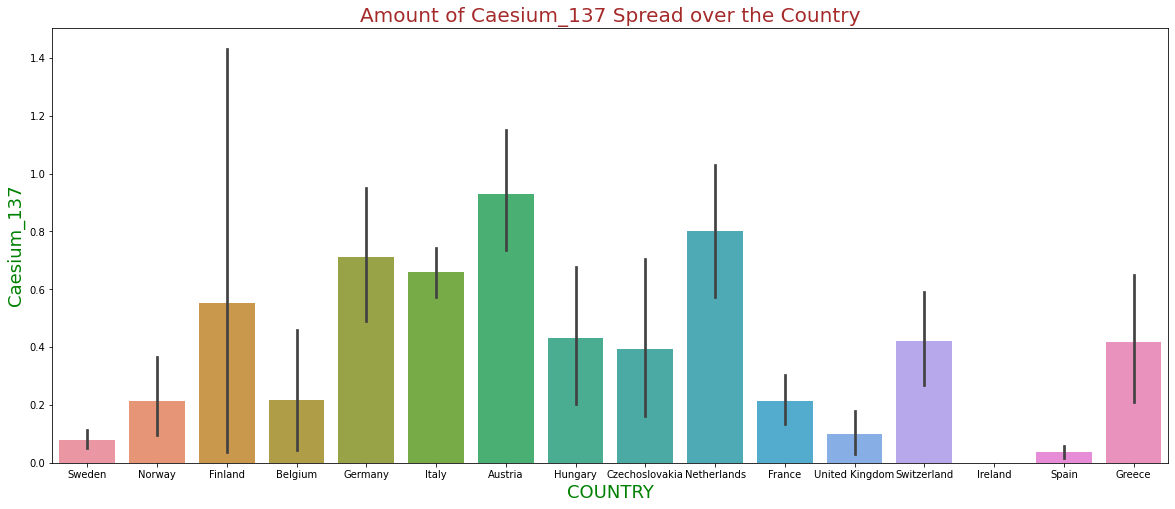

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='PAYS',y='Caesium_137',data=Data)
plt.title("Amount of Caesium_137 Spread over the Country",{"fontsize":20,"color":"brown"})
plt.xlabel("COUNTRY",{"fontsize":18,"color":"green"})
plt.ylabel("Caesium_137",{"fontsize":18,"color":"green"})
plt.show()

**How much Iodine_131 spread over the country ?**

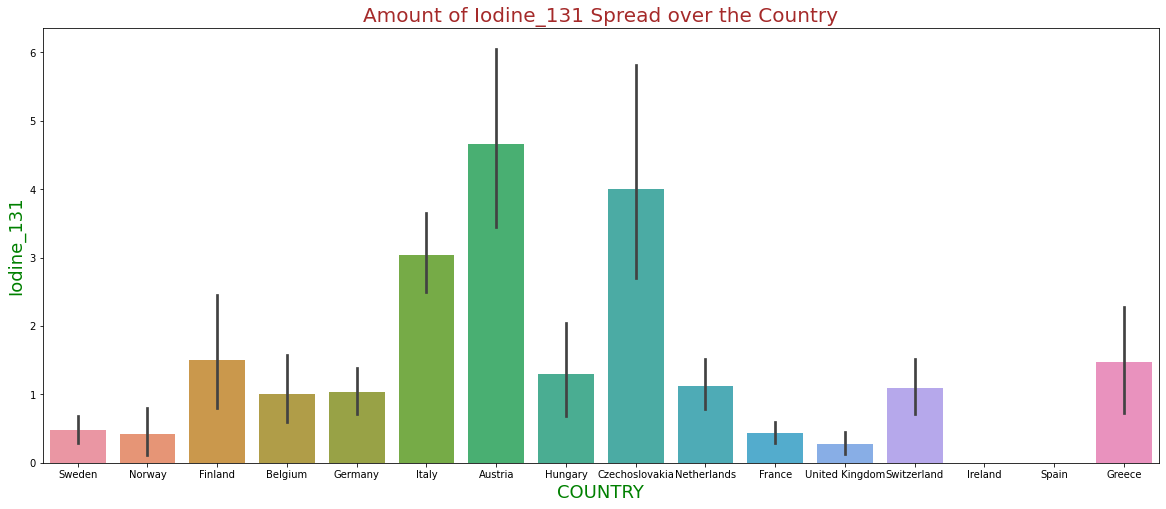

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='PAYS',y='Iodine_131',data=Data)
plt.title("Amount of Iodine_131 Spread over the Country",{"fontsize":20,"color":"brown"})
plt.xlabel("COUNTRY",{"fontsize":18,"color":"green"})
plt.ylabel("Iodine_131",{"fontsize":18,"color":"green"})
plt.show()

**Total rate of Radio Active Materials spread over the country ?**



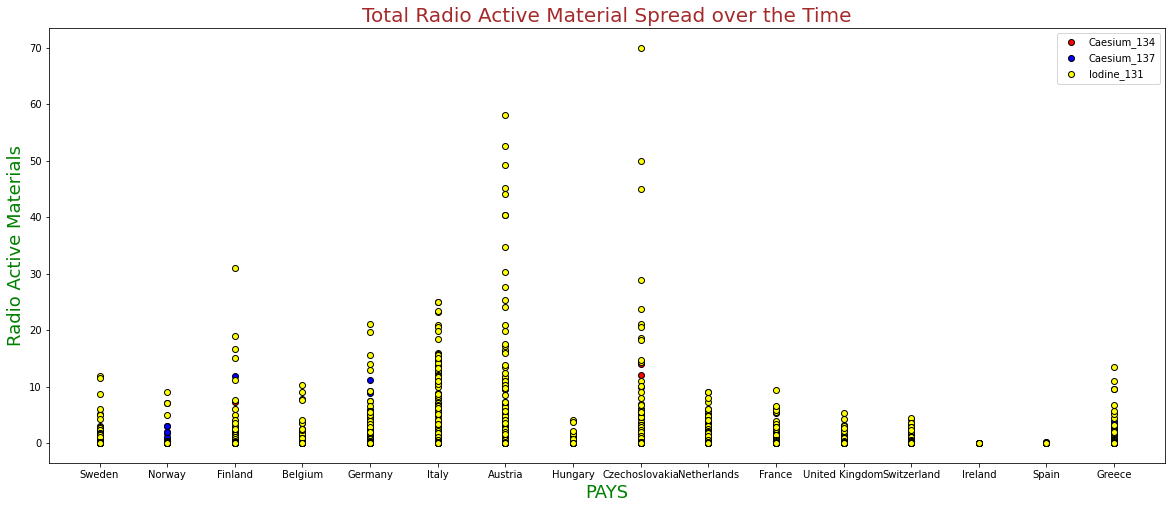

In [ ]:
figure = plt.figure(figsize=(20,8))
plt.scatter(Data["PAYS"],Data["Caesium_134"],label="Caesium_134",color="red",edgecolors="black")
plt.scatter(Data["PAYS"],Data["Caesium_137"],label="Caesium_137",color="blue",edgecolors="black")
plt.scatter(Data["PAYS"],Data["Iodine_131"],label="Iodine_131",color="yellow",edgecolors="black")
plt.title("Total Radio Active Material Spread over the Time",{"fontsize":20,"color":"brown"})
plt.legend()
plt.xlabel("PAYS",{"fontsize":18,"color":"green"})
plt.ylabel("Radio Active Materials",{"fontsize":18,"color":"green"})
plt.show()

**Average rate of total Radio Active Materials spread over the country ?**

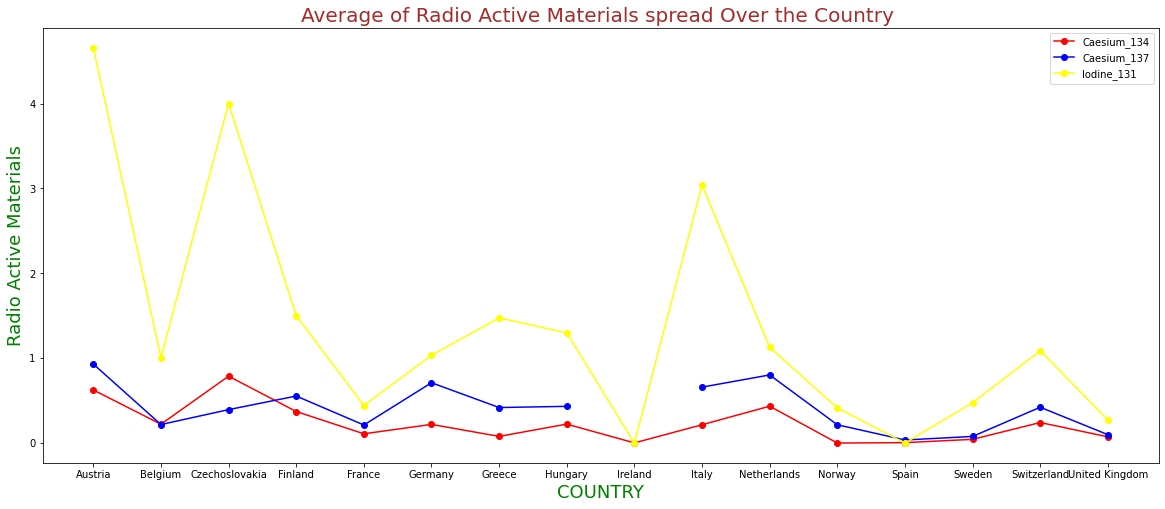

In [ ]:
figure = plt.figure(figsize=(20,8))
plt.plot(Data.groupby(["PAYS"])["Caesium_134"].mean(),label="Caesium_134",marker="o",color="red")
plt.plot(Data.groupby(["PAYS"])["Caesium_137"].mean(),label="Caesium_137",marker="o",color="blue")
plt.plot(Data.groupby(["PAYS"])["Iodine_131"].mean(),label="Iodine_131",marker="o",color="yellow")
plt.title('Average of Radio Active Materials spread Over the Country ',{"fontsize":20,"color":"brown"})
plt.legend()
plt.xlabel("COUNTRY",{"fontsize":18,"color":"green"})
plt.ylabel("Radio Active Materials",{"fontsize":18,"color":"green"})
plt.show()

**which time is Caesium_134 more spread  ?**


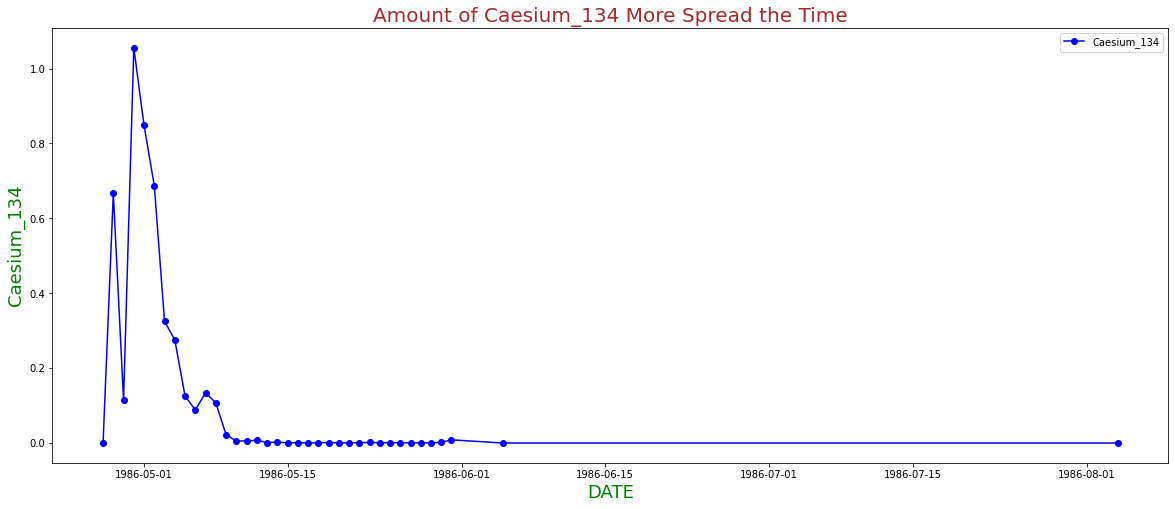

In [ ]:
figure = plt.figure(figsize=(20,8))
plt.plot(Data.groupby(["Date"])["Caesium_134"].mean(),label="Caesium_134",marker="o",color="blue")
plt.title("Amount of Caesium_134 More Spread the Time",{"fontsize":20,"color":"brown"})
plt.legend()
plt.xlabel("DATE",{"fontsize":18,"color":"green"})
plt.ylabel("Caesium_134",{"fontsize":18,"color":"green"})
plt.show()

**which time is Caesium_137 more spread  ?**


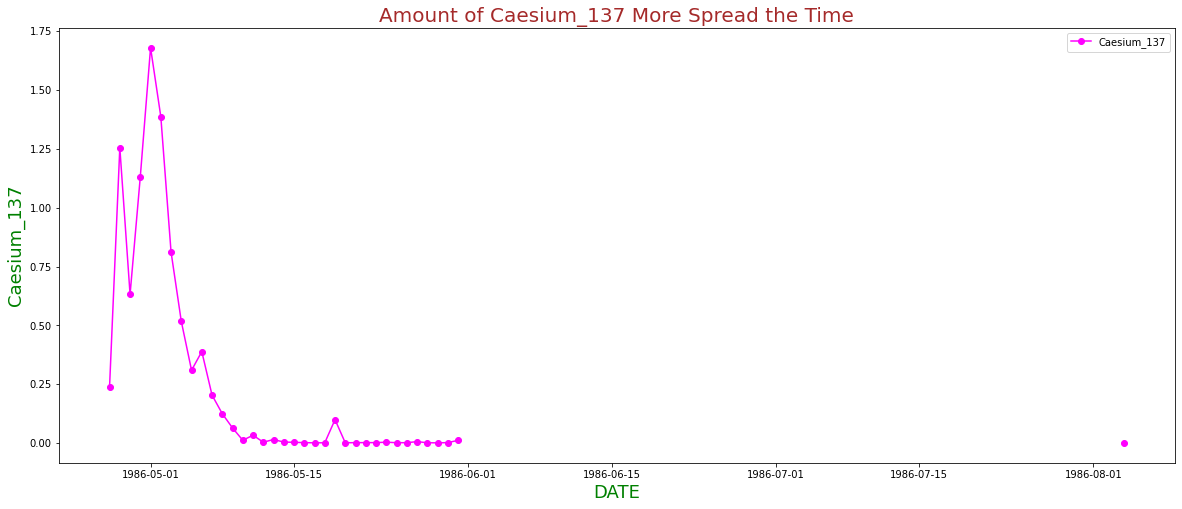

In [ ]:
figure = plt.figure(figsize=(20,8))
plt.plot(Data.groupby(["Date"])["Caesium_137"].mean(),label="Caesium_137",marker="o",color="magenta")
plt.title("Amount of Caesium_137 More Spread the Time",{"fontsize":20,"color":"brown"})
plt.legend()
plt.xlabel("DATE",{"fontsize":18,"color":"green"})
plt.ylabel("Caesium_137",{"fontsize":18,"color":"green"})
plt.show()

**which time is Iodine_131 more spread  ?**



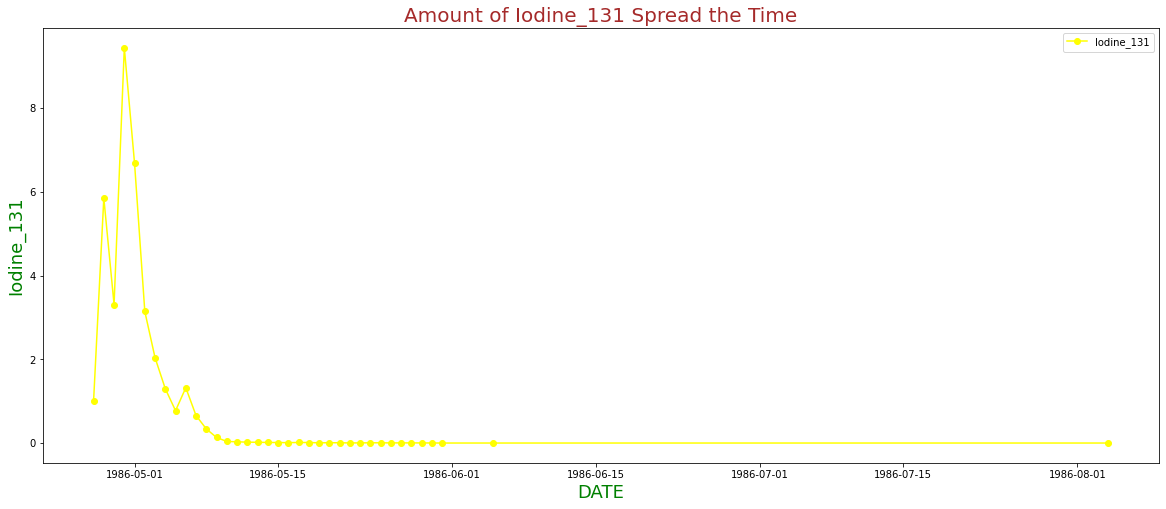

In [ ]:
figure = plt.figure(figsize=(20,8))
plt.plot(Data.groupby(["Date"])["Iodine_131"].mean(),label="Iodine_131",marker="o",color="yellow")
plt.title("Amount of Iodine_131 Spread the Time",{"fontsize":20,"color":"brown"})
plt.legend()
plt.xlabel("DATE",{"fontsize":18,"color":"green"})
plt.ylabel("Iodine_131",{"fontsize":18,"color":"green"})
plt.show()

**which time the Radio Active Materials mostly spreaded ?**

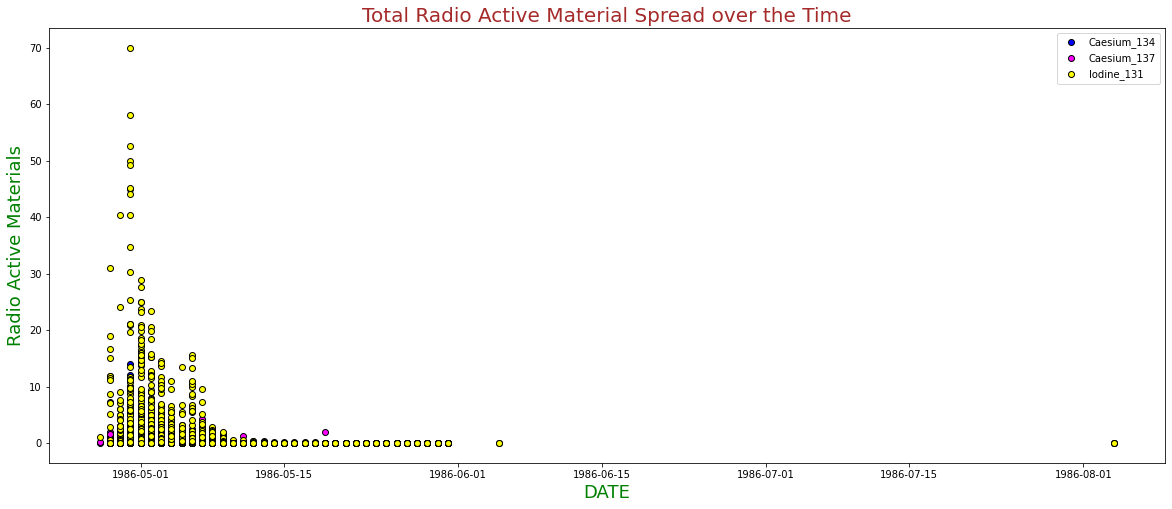

In [ ]:
figure = plt.figure(figsize=(20,8))
plt.grid(False)
plt.scatter(Data["Date"],Data["Caesium_134"],label="Caesium_134",color="blue",edgecolors="black")
plt.scatter(Data["Date"],Data["Caesium_137"],label="Caesium_137",color="magenta",edgecolors="black")
plt.scatter(Data["Date"],Data["Iodine_131"],label="Iodine_131",color="yellow",edgecolors="black")
plt.title("Total Radio Active Material Spread over the Time",{"fontsize":20,"color":"brown"})
plt.legend()
plt.xlabel("DATE",{"fontsize":18,"color":"green"})
plt.ylabel("Radio Active Materials",{"fontsize":18,"color":"green"})
plt.show()

In [ ]:
Data.Location.value_counts()

ISPRA                 101
KONALA(Helsinki)NW     79
CAPANNA                59
STOCKHOLM              58
VIENNA.                56
                     ... 
BANSKA                  6
WALDHOF                 6
MARCOULE                6
USTI                    5
GRAZ                    4
Name: Location, Length: 95, dtype: int64

**which location is most affected in Caesium_134 ?**



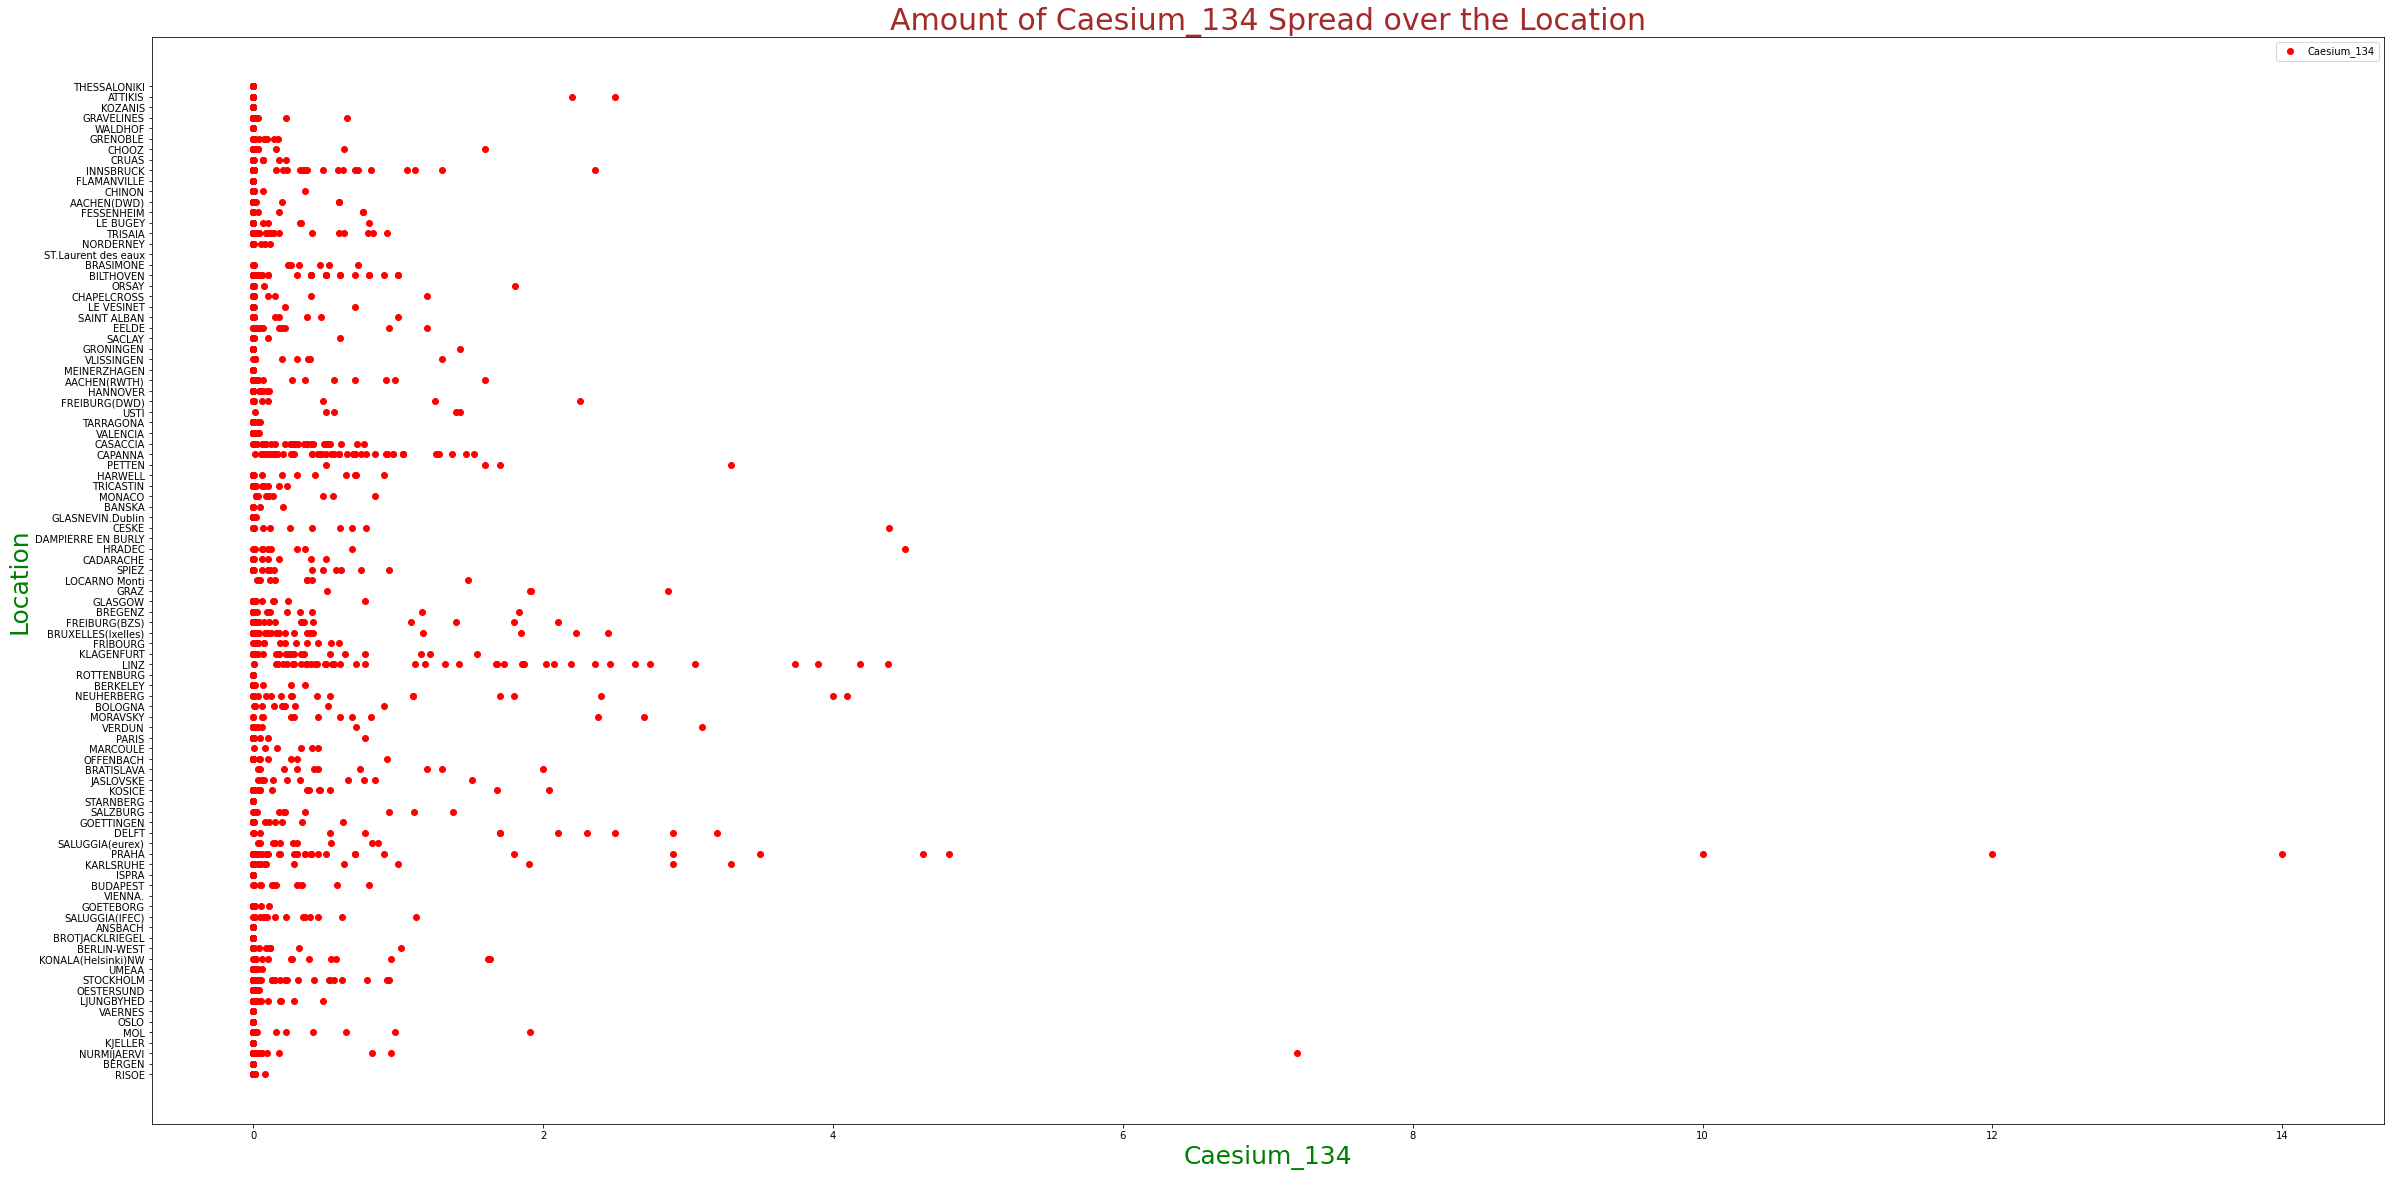

In [ ]:
figure = plt.figure(figsize=(40,20))
plt.scatter(x=Data["Caesium_134"],y=Data["Location"],label="Caesium_134",color="red")
plt.title("Amount of Caesium_134 Spread over the Location",{"fontsize":30,"color":"brown"})
plt.legend()
plt.xlabel("Caesium_134",{"fontsize":25,"color":"green"})
plt.ylabel("Location",{"fontsize":25,"color":"green"})
plt.show()

**which location is most affected in Caesium_137 ?**



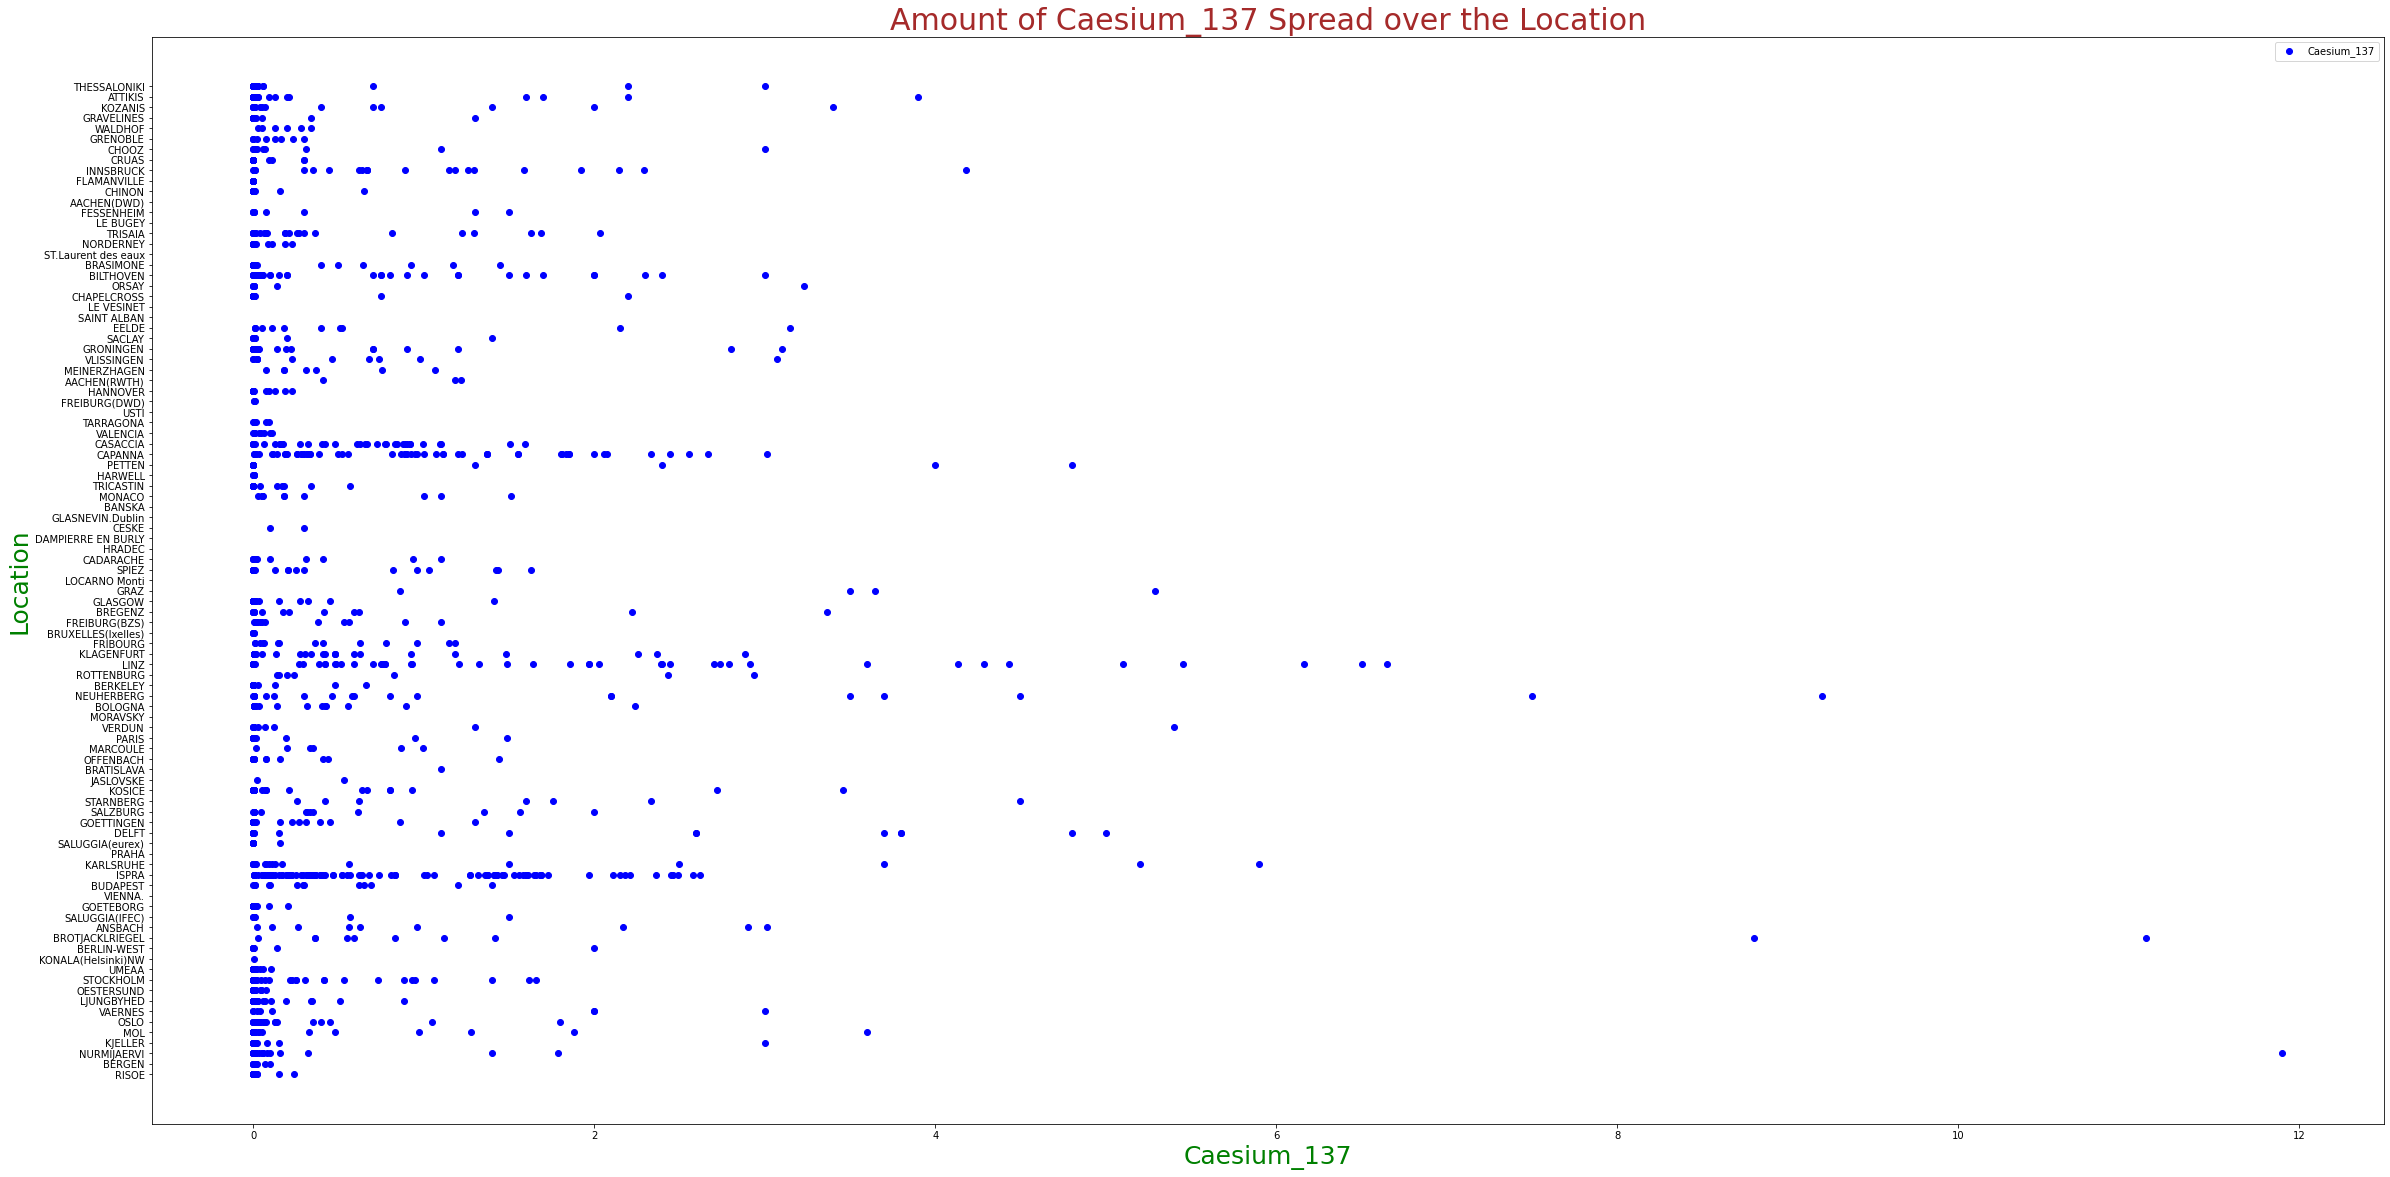

In [ ]:
figure = plt.figure(figsize=(40,20))
plt.scatter(x=Data["Caesium_137"],y=Data["Location"],label="Caesium_137",color="blue")
plt.title("Amount of Caesium_137 Spread over the Location",{"fontsize":30,"color":"brown"})
plt.legend()
plt.xlabel("Caesium_137",{"fontsize":25,"color":"green"})
plt.ylabel("Location",{"fontsize":25,"color":"green"})
plt.show()

**which location is most affected in Iodine_131 ?**



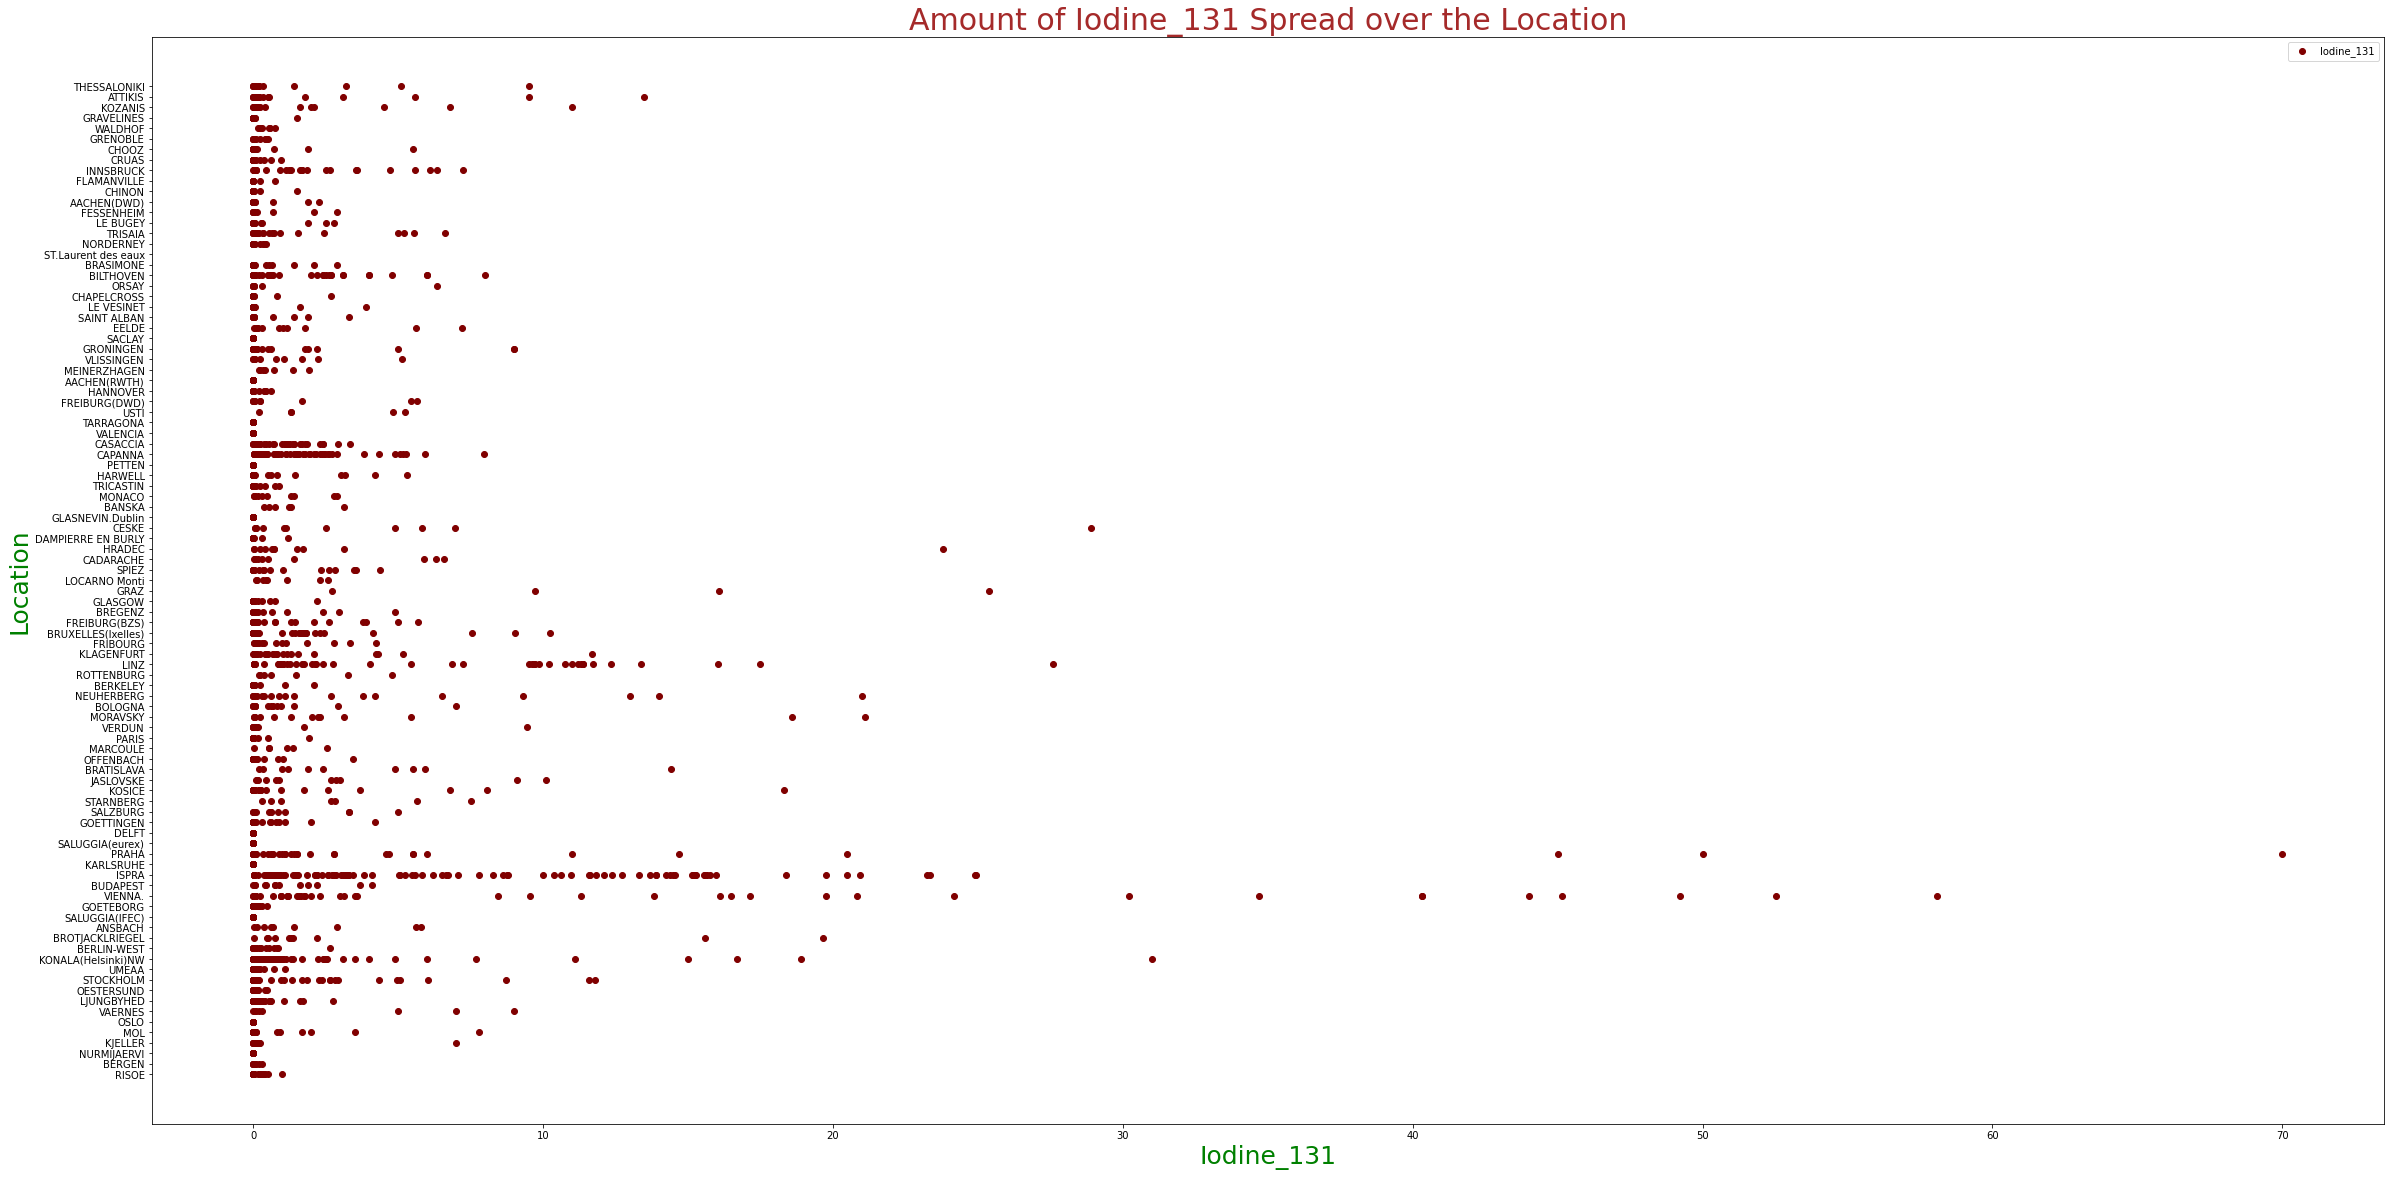

In [ ]:
figure = plt.figure(figsize=(40,20))
plt.scatter(x=Data["Iodine_131"],y=Data["Location"],label="Iodine_131",color="maroon")
plt.title("Amount of Iodine_131 Spread over the Location",{"fontsize":30,"color":"brown"})
plt.legend()
plt.xlabel("Iodine_131",{"fontsize":25,"color":"green"})
plt.ylabel("Location",{"fontsize":25,"color":"green"})
plt.show()

**Total rate of Radio Active Materials spread over the location ?**

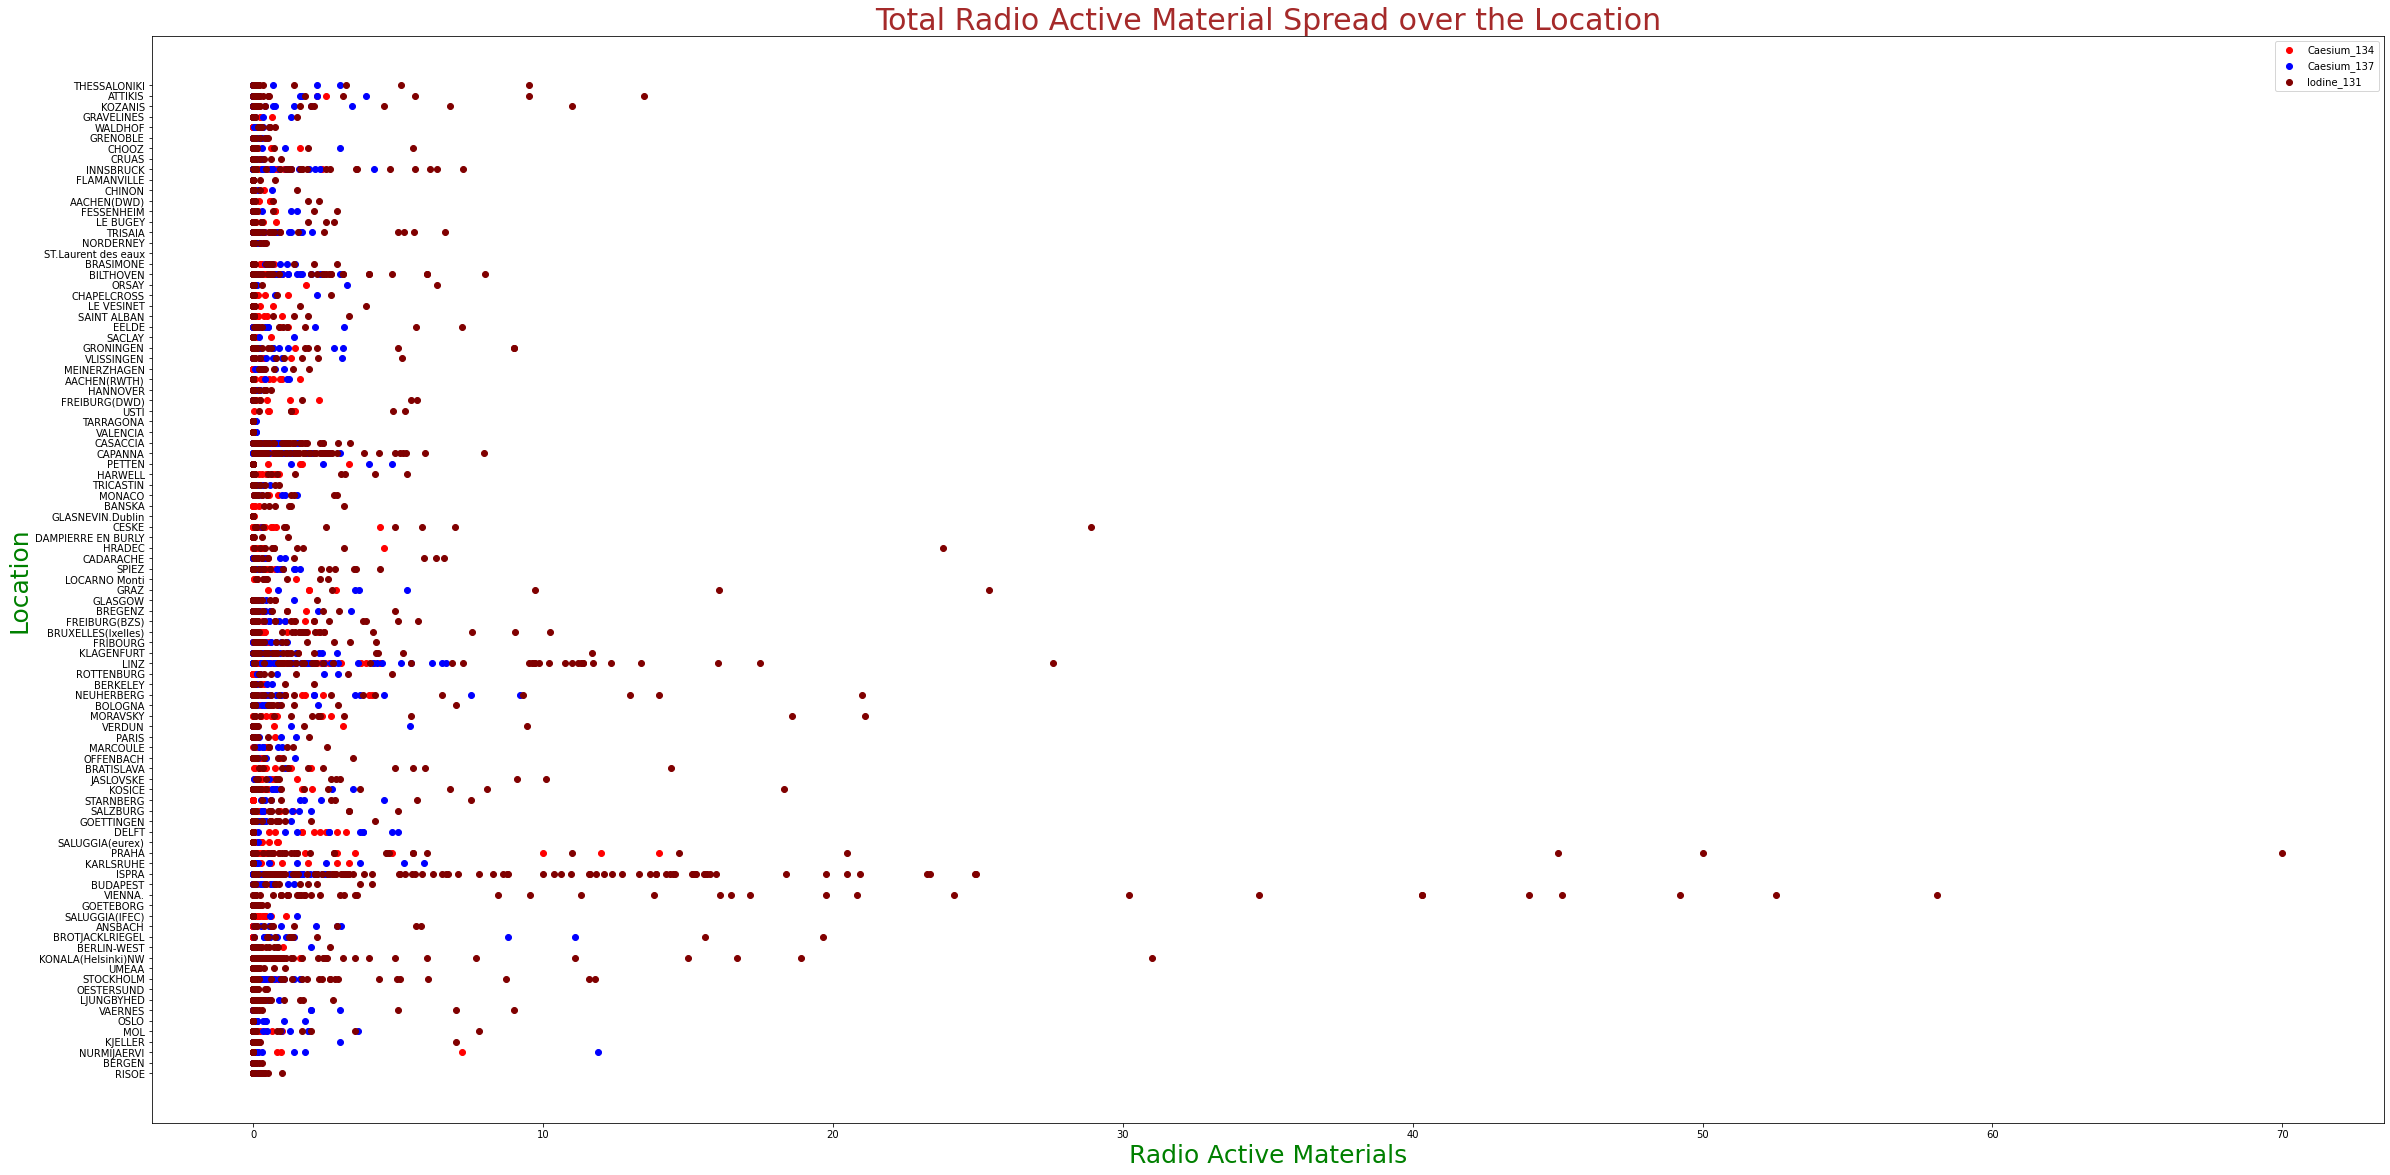

In [ ]:
figure = plt.figure(figsize=(40,20))
plt.scatter(x=Data["Caesium_134"],y=Data["Location"],label="Caesium_134",color="red")
plt.scatter(x=Data["Caesium_137"],y=Data["Location"],label="Caesium_137",color="blue")
plt.scatter(x=Data["Iodine_131"],y=Data["Location"],label="Iodine_131",color="maroon")
plt.title("Total Radio Active Material Spread over the Location",{"fontsize":30,"color":"brown"})
plt.legend()
plt.xlabel("Radio Active Materials",{"fontsize":25,"color":"green"})
plt.ylabel("Location",{"fontsize":25,"color":"green"})
plt.show()

## **Correlation Data**

In [ ]:
Data.corr()

,Longitude,Latitude,Iodine_131,Caesium_134,Caesium_137
Longitude,1.000000,-0.399839,0.173324,0.221983,0.048822
Latitude,-0.399839,1.000000,-0.126797,-0.163054,-0.102467
Iodine_131,0.173324,-0.126797,1.000000,0.686642,0.683019
Caesium_134,0.221983,-0.163054,0.686642,1.000000,0.795974
Caesium_137,0.048822,-0.102467,0.683019,0.795974,1.000000


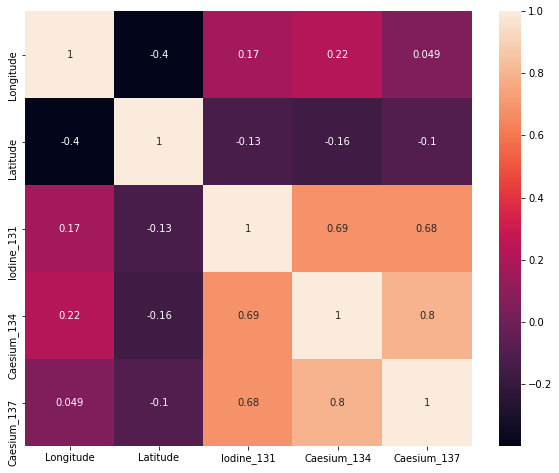

In [ ]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(),annot=True)
plt.show()